# Introduction to Statistics in Python

## Chapter 2: Random Numbers and Probability

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
food_consumption = pd.read_csv("food_consumption.csv", header=0)
food_consumption

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


In [8]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption["country"]=="Belgium"]

# Filter for USA
usa_consumption = food_consumption[food_consumption["country"]=="USA"]

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption["consumption"]))
print(np.median(be_consumption["consumption"]))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption["consumption"]))
print(np.median(usa_consumption["consumption"]))

42.13272727272727
12.59
44.650000000000006
14.58


In [9]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption["country"]=="Belgium") | (food_consumption["country"]=="USA")]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby("country")["consumption"].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


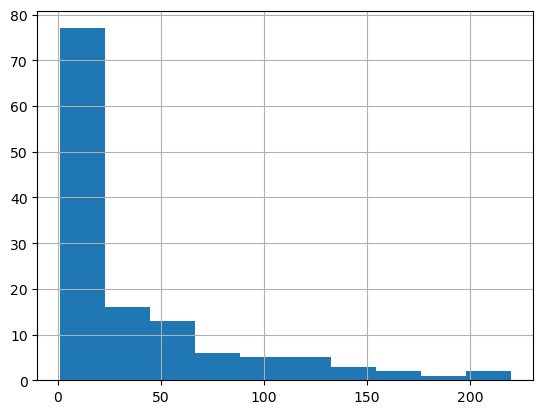

In [11]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption["food_category"]=="rice"]

# Histogram of co2_emission for rice and show plot
rice_consumption["co2_emission"].hist()
plt.show()

In [12]:
# Calculate mean and median of co2_emission with .agg()
print(rice_consumption["co2_emission"].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


Outliers:
- data < $Q1 - 1.5 \times IQR$
- data > $Q3 + 1.5 \times IQR$


In [13]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 5)))

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 6)))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


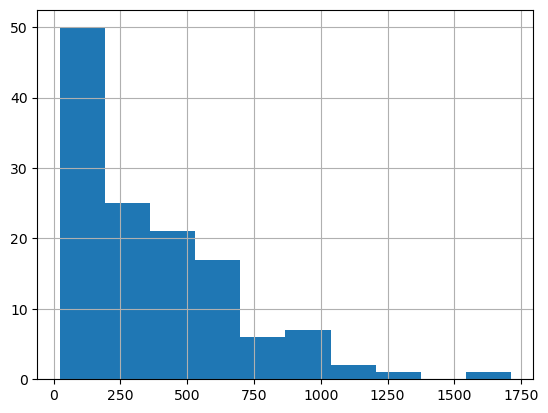

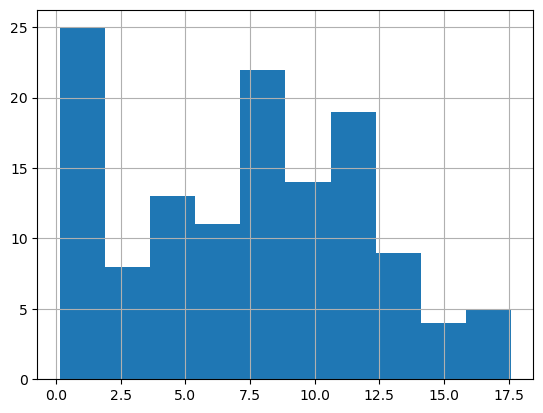

In [14]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby("food_category")["co2_emission"].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption["food_category"]=="beef"]["co2_emission"].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption["food_category"]=="eggs"]["co2_emission"].hist()
# Show plot
plt.show()

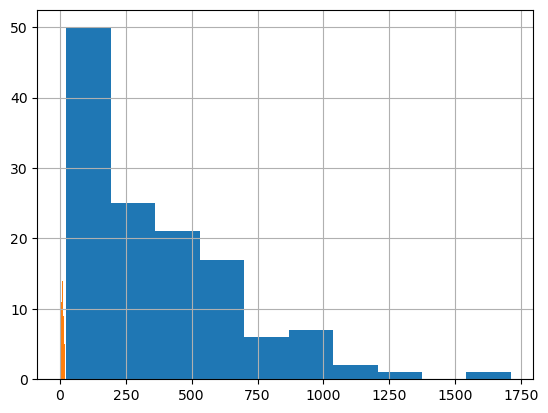

In [15]:
# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption["food_category"]=="beef"]["co2_emission"].hist()
# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption["food_category"]=="eggs"]["co2_emission"].hist()
# Show plot
plt.show()

In [17]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country)

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64


In [18]:
# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


It looks like Argentina has a substantially higher amount of CO2 emissions per person than other countries in the world.